In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Infosys722_Iteration4").getOrCreate()
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
# Let's import the relevant functions.
from pyspark.sql.functions import dayofmonth,month,hour,year,format_number

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
#from sklearn.cluster import KMeans
from collections import Counter
#from sklearn.decomposition import PCA

#from imblearn import under_sampling 
#from imblearn import over_sampling
#from imblearn.over_sampling import SMOTE

In [8]:
#Import the data into the system
#print("Hello World")
data = spark.read.load("./cardio_train.csv", format = "csv", header = "true")
#Checking the data attributes and their data type
data

DataFrame[id: string, age: string, gender: string, height: string, weight: string, ap_hi: string, ap_lo: string, cholesterol: string, gluc: string, smoke: string, alco: string, active: string, cardio: string]

In [2]:
data = pd.read_csv("./cardio_train.csv")
data.corr()["cardio"]
data.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [24]:
(data == 0).astype(int).sum(axis = 0)

id                1
age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             1
cholesterol       0
gluc              0
smoke          9110
alco           9463
active         2028
cardio         4969
dtype: int64


<class 'pandas.core.series.Series'>
4969
5031
[20228. 18857. 17623. ... 18214. 18328. 19702.]
[18393. 17474. 21914. ... 14418. 20427. 14665.]
[20228. 18857. 17623. ... 18214. 18328. 19702.]


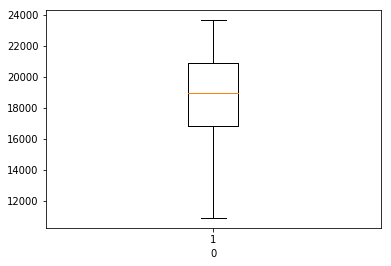

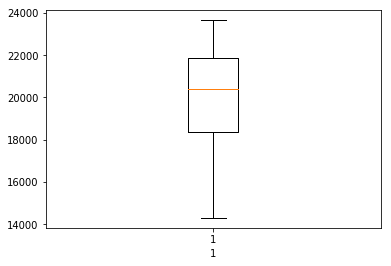

id             0.004250
age            0.238079
gender         0.002226
height        -0.008353
weight         0.183325
ap_hi          0.071295
ap_lo          0.077051
cholesterol    0.221273
gluc           0.082441
smoke         -0.018093
alco          -0.006357
active        -0.039153
cardio         1.000000
Name: cardio, dtype: float64


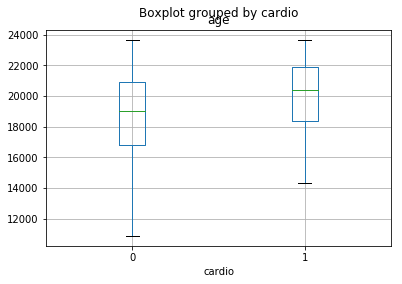

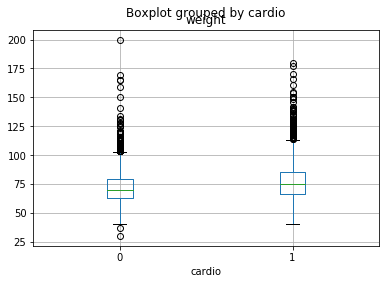

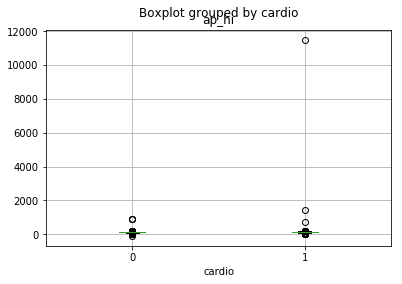

In [6]:
#ploting the relationship between age and cardio
cardio0 = data["cardio"] == 0
print()
print(type(cardio0))
cardio1 = data["cardio"] == 1

count_0 = 0
count_1 = 0

cardio_0=np.zeros(4969)
cardio_1 = np.zeros(5031)

for i in range(len(data)):
    if(cardio0[i] == True):
        cardio_0[count_0] = data["age"][i]
        count_0 += 1
    else:
        cardio_1[count_1] = data["age"][i]
        count_1 += 1
print(len(cardio_0))
print(len(cardio_1))
print(cardio_1)

print(cardio_0)
print(cardio_1)
plt.boxplot(cardio_0)
plt.xlabel("0")
plt.show()
plt.boxplot(cardio_1)
plt.xlabel("1")
plt.show()

print(data.corr()["cardio"])

#plotting between relationships
data.boxplot(column='age', by='cardio')
plt.show()
data.boxplot(column='weight', by='cardio')
plt.show()
data.boxplot(column='ap_hi', by='cardio')
plt.show()

In [25]:
(data < 0).astype(int).sum(axis = 0)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          1
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
#Checking the data variables
data.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [26]:
data["ap_hi"].skew()

92.4716891385389

In [27]:
data["ap_hi"].describe()

count    10000.000000
mean       128.037000
std        116.835614
min       -100.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      11500.000000
Name: ap_hi, dtype: float64

In [28]:
data["ap_lo"].skew()

31.627639463890915

In [29]:
data["ap_lo"].describe()

count    10000.000000
mean        97.954100
std        207.197957
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

In [31]:
data["age"].skew()

-0.31419363315654414

In [32]:
data["height"].skew()

-0.27493935786451135

In [33]:
data["weight"].skew()

1.1410541138593309

In [38]:
new_cardio = data[["age", "gender","height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]
print(new_cardio.head(20))
print(new_cardio.shape)
data["weight"].describe()


Q1 = new_cardio.quantile(0.25)
Q3 = new_cardio.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

# Any outliers or extreme values for the "ap_hi"
data["ap_hi"].describe()
#Drop any values that are <= 0 
print(new_cardio[new_cardio["ap_hi"] <= 0].iloc[0])
new_cardio = new_cardio.drop(new_cardio[new_cardio["ap_hi"] <= 0].index)

print(Q3["ap_hi"]) #Q3 value for "ap_hi"
print(new_cardio[new_cardio["ap_hi"] > Q3["ap_hi"] + 1.5 * IQR["ap_hi"]]) #152 Rows
print(new_cardio[new_cardio["ap_hi"] < Q1["ap_hi"] - 1.5 * IQR["ap_hi"]]) #58 Rows

sns.boxplot(new_cardio["ap_hi"])

#Quantile-based Flooring and Capping (Replace outliers to the nearest true value)
print(new_cardio['ap_hi'].skew())
print(new_cardio['ap_hi'].quantile(0.10)) #110.0
print(new_cardio['ap_hi'].quantile(0.90)) #150.0

#np.where(condition, x, y) IF match the condtion, output x, otherwise y
new_cardio["ap_hi"] = np.where(new_cardio["ap_hi"] < 110.0, 110.0, new_cardio['ap_hi'])
new_cardio["ap_hi"] = np.where(new_cardio["ap_hi"] > 150.0, 150.0, new_cardio['ap_hi'])
print(new_cardio['ap_hi'].skew())
#sns.boxplot(new_cardio["ap_hi"])

# Any outliers or extreme values for the "ap_lo"
data["ap_lo"].describe()
print(new_cardio[new_cardio["ap_lo"] > Q3["ap_lo"] + 1.5 * IQR["ap_lo"]]) #248 Rows
print(new_cardio[new_cardio["ap_lo"] < Q1["ap_lo"] - 1.5 * IQR["ap_lo"]]) #396 Rows
#sns.boxplot(new_cardio["ap_lo"])

#Quantile-based Flooring and Capping (Replace outliers to the nearest true value)
print(new_cardio['ap_lo'].skew())
print(new_cardio['ap_lo'].quantile(0.05)) #70.0
print(new_cardio['ap_lo'].quantile(0.95)) #100.0

#np.where(condition, x, y) IF match the condtion, output x, otherwise y
new_cardio["ap_lo"] = np.where(new_cardio["ap_lo"] < 70.0, 70.0, new_cardio['ap_lo'])
new_cardio["ap_lo"] = np.where(new_cardio["ap_lo"] > 100.0, 100.0, new_cardio['ap_lo'])
print(new_cardio['ap_lo'].skew())
#sns.boxplot(new_cardio["ap_lo"])

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   
5   21914       1     151    67.0    120     80            2     2      0   
6   22113       1     157    93.0    130     80            3     1      0   
7   22584       2     178    95.0    130     90            3     3      0   
8   17668       1     158    71.0    110     70            1     1      0   
9   19834       1     164    68.0    110     60            1     1      0   
10  22530       1     169    80.0    120     80            1     1      0   
11  18815       2     173    60.0    120     80            1     1      0   

NameError: name 'sns' is not defined

In [39]:
# Any outliers or extreme values for the "ap_lo"
data["ap_lo"].describe()
print(new_cardio[new_cardio["ap_lo"] > Q3["ap_lo"] + 1.5 * IQR["ap_lo"]]) #248 Rows
print(new_cardio[new_cardio["ap_lo"] < Q1["ap_lo"] - 1.5 * IQR["ap_lo"]]) #396 Rows
#sns.boxplot(new_cardio["ap_lo"])

#Quantile-based Flooring and Capping (Replace outliers to the nearest true value)
print(new_cardio['ap_lo'].skew())
print(new_cardio['ap_lo'].quantile(0.05)) #70.0
print(new_cardio['ap_lo'].quantile(0.95)) #100.0

#np.where(condition, x, y) IF match the condtion, output x, otherwise y
new_cardio["ap_lo"] = np.where(new_cardio["ap_lo"] < 70.0, 70.0, new_cardio['ap_lo'])
new_cardio["ap_lo"] = np.where(new_cardio["ap_lo"] > 100.0, 100.0, new_cardio['ap_lo'])
print(new_cardio['ap_lo'].skew())
#sns.boxplot(new_cardio["ap_lo"])

# Any outliers or extreme values for the "height"
data["height"].describe()
print(new_cardio[new_cardio["height"] > Q3["height"] + 1.5 * IQR["height"]]) #43
print(new_cardio[new_cardio["height"] < Q1["height"] - 1.5 * IQR["height"]]) #31
sns.boxplot(new_cardio["height"])

#Quantile-based Flooring and Capping (Replace outliers to the nearest true value)
print(new_cardio['height'].skew())
print(new_cardio['height'].quantile(0.10)) #154.0
print(new_cardio['height'].quantile(0.90)) #175.0

new_cardio["height"] = np.where(new_cardio["height"] < 154.0, 154.0, new_cardio['height'])
new_cardio["height"] = np.where(new_cardio["height"] > 175.0, 175.0, new_cardio['height'])
print(new_cardio['height'].skew())


# Any outliers or extreme values for the "ap_lo"
print(new_cardio[new_cardio["weight"] > 150]) #12 rows
#Drop outliers in the weight column
new_cardio = new_cardio.drop(new_cardio[new_cardio["weight"] >150.0].index)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
97    18410       1     165    99.0    150    110            1     1      0   
115   21900       2     160    57.0    170    110            1     1      0   
228   17489       2     183    98.0    160   1100            1     2      1   
241   21932       2     157    60.0    160   1000            2     1      0   
260   18217       1     150    83.0    140    800            1     1      0   
296   20948       2     169    76.0    170    110            1     1      0   
329   23407       1     176    63.0    160   1000            2     2      0   
345   18704       1     154    81.0    140   1000            2     1      0   
372   15215       2     172    71.0    160    120            3     3      1   
423   21894       1     157    86.0    169    109            3     1      0   
473   15226       1     150    95.0    150   1033            1     1      0   
474   19099       1     156    65.0    120    150   

NameError: name 'sns' is not defined

In [30]:
#Display the data (First 20 rows)
data.show(20)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70

In [43]:
Q1 = new_cardio.quantile(0.25)
Q3 = new_cardio.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

# Any outliers or extreme values for the "ap_hi"
data["ap_hi"].describe()
#Drop any values that are <= 0 
#print(new_cardio[new_cardio["ap_hi"] <= 0].iloc[0])
#new_cardio = new_cardio.drop(new_cardio[new_cardio["ap_hi"] <= 0].index)

age            21314.0
gender             2.0
height           170.0
weight            82.0
ap_hi            140.0
ap_lo             90.0
cholesterol        2.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             1.0
Name: 0.75, dtype: float64
age            3683.5
gender            1.0
height           11.0
weight           17.0
ap_hi            20.0
ap_lo            10.0
cholesterol       1.0
gluc              0.0
smoke             0.0
alco              0.0
active            0.0
cardio            1.0
dtype: float64


count    10000.000000
mean       128.037000
std        116.835614
min       -100.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      11500.000000
Name: ap_hi, dtype: float64

In [44]:
# Any outliers or extreme values for the "height"
data["height"].describe()
print(new_cardio[new_cardio["height"] > Q3["height"] + 1.5 * IQR["height"]]) #43
print(new_cardio[new_cardio["height"] < Q1["height"] - 1.5 * IQR["height"]]) #31
#sns.boxplot(new_cardio["height"])

#Quantile-based Flooring and Capping (Replace outliers to the nearest true value)
print(new_cardio['height'].skew())
print(new_cardio['height'].quantile(0.10)) #154.0
print(new_cardio['height'].quantile(0.90)) #175.0

new_cardio["height"] = np.where(new_cardio["height"] < 154.0, 154.0, new_cardio['height'])
new_cardio["height"] = np.where(new_cardio["height"] > 175.0, 175.0, new_cardio['height'])
print(new_cardio['height'].skew())


# Any outliers or extreme values for the "ap_lo"
print(new_cardio[new_cardio["weight"] > 150]) #12 rows
#Drop outliers in the weight column
new_cardio = new_cardio.drop(new_cardio[new_cardio["weight"] >150.0].index)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
62    20330       2     187   115.0    130   90.0            1     1      0   
76    20397       2     188   105.0    120   80.0            1     1      0   
1027  15220       2     195   111.0    148   86.0            1     1      0   
1117  22156       2     198    68.0    120   80.0            1     1      0   
1419  17601       2     187   103.0    150  100.0            2     1      0   
2160  16160       2     196    74.0    140   90.0            1     1      1   
2203  21776       2     187    80.0     12   80.0            1     1      1   
2463  17615       2     187   100.0    150   90.0            1     1      1   
2680  18992       2     194    89.0    110   70.0            1     1      0   
2883  20360       1     190    74.0    120   80.0            1     1      0   
3212  16836       2     195   117.0    130   80.0            3     3      0   
3237  16072       2     198    61.0    110   70.0   

In [12]:
# Instead, let's just grab the first row. Much neater! 
data.head(1)

[Row(id='0', age='18393', gender='2', height='168', weight='62', ap_hi='110', ap_lo='80', cholesterol='1', gluc='1', smoke='0', alco='0', active='1', cardio='0')]

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   18393       2   168.0    62.0    110   80.0            1     1      0   
1   20228       1   156.0    85.0    140   90.0            3     1      0   
2   18857       1   165.0    64.0    130   70.0            3     1      0   
3   17623       2   169.0    82.0    150  100.0            1     1      0   
4   17474       1   156.0    56.0    100   70.0            1     1      0   
5   21914       1   154.0    67.0    120   80.0            2     2      0   
6   22113       1   157.0    93.0    130   80.0            3     1      0   
7   22584       2   175.0    95.0    130   90.0            3     3      0   
8   17668       1   158.0    71.0    110   70.0            1     1      0   
9   19834       1   164.0    68.0    110   70.0            1     1      0   
10  22530       1   169.0    80.0    120   80.0            1     1      0   
11  18815       2   173.0    60.0    120   80.0            1     1      0   

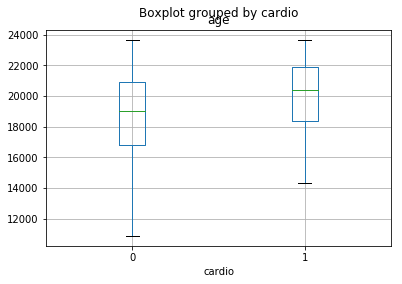

[4. 3. 2.]
0
0     4.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     4.0
9     4.0
10    4.0
11    4.0
12    3.0
13    4.0
14    3.0
15    4.0
16    4.0
17    4.0
18    4.0
19    4.0
Name: age_group, dtype: float64
['Normal Weight' 'Obesity' 'Overweight' 'Thin' 'Excessive Obesity']
0           Normal Weight
1                 Obesity
2           Normal Weight
3              Overweight
4           Normal Weight
5              Overweight
6                 Obesity
7              Overweight
8              Overweight
9              Overweight
10             Overweight
11          Normal Weight
12          Normal Weight
13             Overweight
14             Overweight
15                Obesity
16             Overweight
17          Normal Weight
18             Overweight
19          Normal Weight
20             Overweight
21             Overweight
22                Obesity
23                   Thin
24          Normal Weight
25             Overweight
26         

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI_Group
0,18393,2,168.0,62.0,110,80.0,1,1,0,0,1,0,4.0,Normal Weight
1,20228,1,156.0,85.0,140,90.0,3,1,0,0,1,1,4.0,Obesity
2,18857,1,165.0,64.0,130,70.0,3,1,0,0,0,1,4.0,Normal Weight
3,17623,2,169.0,82.0,150,100.0,1,1,0,0,1,1,4.0,Overweight
4,17474,1,156.0,56.0,100,70.0,1,1,0,0,0,0,4.0,Normal Weight
5,21914,1,154.0,67.0,120,80.0,2,2,0,0,0,0,4.0,Overweight
6,22113,1,157.0,93.0,130,80.0,3,1,0,0,1,0,4.0,Obesity
7,22584,2,175.0,95.0,130,90.0,3,3,0,0,1,1,4.0,Overweight
8,17668,1,158.0,71.0,110,70.0,1,1,0,0,1,0,4.0,Overweight
9,19834,1,164.0,68.0,110,70.0,1,1,0,0,0,0,4.0,Overweight


In [47]:
print(new_cardio.head(20))
#print(new_cardio)
data.boxplot(column='age', by='cardio')
plt.show()

for i in new_cardio.index:
    if new_cardio.loc[i, "age"] > 0 and new_cardio.loc[i, "age"] < 6570:
        new_cardio.loc[i, "age_group"] = 1
    elif new_cardio.loc[i, "age"] >= 6570 and new_cardio.loc[i, "age"] < 10950:
        new_cardio.loc[i, "age_group"] = 2
    elif new_cardio.loc[i, "age"] >= 10950 and new_cardio.loc[i, "age"] < 16425:
        new_cardio.loc[i, "age_group"] = 3
    elif new_cardio.loc[i, "age"] >= 16425 and new_cardio.loc[i, "age"] < 23725:
        new_cardio.loc[i, "age_group"] = 4
    else:
        new_cardio.loc[i, "age_group"] = 5
print(new_cardio["age_group"].unique())
print(len(new_cardio[new_cardio["age_group"] == 5]))
print(new_cardio["age_group"].head(20))



for i in new_cardio.index:
    bmi = new_cardio.loc[i, "weight"] / ((new_cardio.loc[i, "height"] / 100)**2)
    if bmi < 18.5:
        new_cardio.loc[i, "BMI_Group"] = "Thin"
    elif bmi >= 18.5 and bmi <= 24.9:
        new_cardio.loc[i, "BMI_Group"] = "Normal Weight"
    elif bmi > 24.9 and bmi <= 34.9:
        new_cardio.loc[i, "BMI_Group"] = "Overweight"
    elif bmi > 34.9 and bmi <= 39.9:
        new_cardio.loc[i, "BMI_Group"] = "Obesity"
    else:
        new_cardio.loc[i, "BMI_Group"] = "Excessive Obesity"
        
# print(new_cardio)
print(new_cardio["BMI_Group"].unique())
print(new_cardio["BMI_Group"])

print(len(new_cardio[new_cardio["BMI_Group"] == "Excessive Obesity"]))
new_cardio

In [51]:
new_cardio.corr()["cardio"]

age            0.238441
gender         0.001883
height        -0.012611
weight         0.187280
ap_hi          0.071028
ap_lo          0.363123
cholesterol    0.221663
gluc           0.082539
smoke         -0.018795
alco          -0.006339
active        -0.039747
cardio         1.000000
age_group      0.161352
Name: cardio, dtype: float64

In [52]:
new_cardio["height"].skew()

0.02757641715656878

In [53]:
new_cardio["alco"].skew()

3.9571826475869982

In [54]:
new_cardio["smoke"].skew()

2.889069392741855

In [56]:
cardio_data = new_cardio[["age", "gender", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "active", "Age_Group", "BMI"]]
print(cardio_data)

# sns.barplot(x = [0, 1], y = cardio_NDF["cardio"])[0].Counter(cardio_NDF["cardio"])
# plt.show()

#counter = Counter(cardio_NDF["cardio"])
counter = Counter(new_cardio["cardio"])
#print(counter)

sm = SMOTE()
x_att, y_label = sm.fit_resample(cardio_data, cardio_NDF["cardio"])
print(Counter(y_label))

        age  gender  weight  ap_hi  ap_lo  cholesterol  gluc  active
0     18393       2    62.0    110   80.0            1     1       1
1     20228       1    85.0    140   90.0            3     1       1
2     18857       1    64.0    130   70.0            3     1       0
3     17623       2    82.0    150  100.0            1     1       1
4     17474       1    56.0    100   70.0            1     1       0
5     21914       1    67.0    120   80.0            2     2       0
6     22113       1    93.0    130   80.0            3     1       1
7     22584       2    95.0    130   90.0            3     3       1
8     17668       1    71.0    110   70.0            1     1       1
9     19834       1    68.0    110   70.0            1     1       0
10    22530       1    80.0    120   80.0            1     1       1
11    18815       2    60.0    120   80.0            1     1       1
12    14791       2    60.0    120   80.0            1     1       0
13    19809       1    78.0    110

NameError: name 'SMOTE' is not defined

In [13]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- ap_hi: string (nullable = true)
 |-- ap_lo: string (nullable = true)
 |-- cholesterol: string (nullable = true)
 |-- gluc: string (nullable = true)
 |-- smoke: string (nullable = true)
 |-- alco: string (nullable = true)
 |-- active: string (nullable = true)
 |-- cardio: string (nullable = true)



In [18]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
data.describe().show()
#data.select("age").describe().show()

+-------+-----------------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|summary|               id|               age|            gender|          height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|             smoke|               alco|            active|            cardio|
+-------+-----------------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|  count|            10000|             10000|             10000|           10000|             10000|             10000|            10000|             10000|             10000|             10000|              10000|             10000|    

In [14]:
# Then create a variable with the correct structure.
data_schema = [StructField('id',IntegerType(), True),
              StructField('age',StringType(), True)]

final_struct = StructType(fields = data_schema)
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.csv('./cardio_train.csv', schema=final_struct)

df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: string (nullable = true)



In [15]:
# We can also select various columns from a DataFrame. 
data.select('age').show()

+-----+
|  age|
+-----+
|18393|
|20228|
|18857|
|17623|
|17474|
|21914|
|22113|
|22584|
|17668|
|19834|
|22530|
|18815|
|14791|
|19809|
|14532|
|16782|
|21296|
|16747|
|17482|
|21755|
+-----+
only showing top 20 rows



In [ ]:
# We can also add columns, manipulating the DataFrame.

df.withColumn('double_age',df['age']*2).show()

# But note that this doesn't alter the original DataFrame. You need to assign the output to a new variable in order to do so.
df.show()

In [16]:
# We can rename columns too! 
data.withColumnRenamed('age', 'Age').show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  Age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70

In [19]:
#Introducing SQL
# First, we have to register the DataFrame as a SQL temporary view.
data.createOrReplaceTempView('cardio')

# After that, we can use the SQL programming language for queries. 
results = spark.sql("SELECT * FROM cardio")
results

DataFrame[id: string, age: string, gender: string, height: string, weight: string, ap_hi: string, ap_lo: string, cholesterol: string, gluc: string, smoke: string, alco: string, active: string, cardio: string]

In [20]:
# Here's another example:
results = spark.sql("SELECT age FROM cardio WHERE age >= 19")
results.show()

+-----+
|  age|
+-----+
|18393|
|20228|
|18857|
|17623|
|17474|
|21914|
|22113|
|22584|
|17668|
|19834|
|22530|
|18815|
|14791|
|19809|
|14532|
|16782|
|21296|
|16747|
|17482|
|21755|
+-----+
only showing top 20 rows



In [23]:
# Even though we know SQL is available, let's try out some of the DataFrame methods.
# For this example, let's have a look at the opeening and closing value where close is less than 500.
data.filter("gender = 1").select('Age','gender').show()

+-----+------+
|  Age|gender|
+-----+------+
|20228|     1|
|18857|     1|
|17474|     1|
|21914|     1|
|22113|     1|
|17668|     1|
|19834|     1|
|22530|     1|
|19809|     1|
|21296|     1|
|16747|     1|
|17482|     1|
|21413|     1|
|23046|     1|
|16608|     1|
|14453|     1|
|19559|     1|
|18085|     1|
|18291|     1|
|23186|     1|
+-----+------+
only showing top 20 rows



In [27]:
# We can also use Python within the DataFrame filter method!
data.filter(data['gender'] == 1).select('Age','gender').show()

# And we can use multiple operations! 
# Here we're looking for significant increases in stock.
#df.filter( (df['Close'] > 500) & (df['Open'] < 495) ).select('Open','Close').show()

+-----+------+
|  Age|gender|
+-----+------+
|20228|     1|
|18857|     1|
|17474|     1|
|21914|     1|
|22113|     1|
|17668|     1|
|19834|     1|
|22530|     1|
|19809|     1|
|21296|     1|
|16747|     1|
|17482|     1|
|21413|     1|
|23046|     1|
|16608|     1|
|14453|     1|
|19559|     1|
|18085|     1|
|18291|     1|
|23186|     1|
+-----+------+
only showing top 20 rows



In [28]:
# Let's pick a row of data with a low of $197.16 and collect it.  
first_id = data.filter(data['id'] == 0).collect()
# When we collect it, you may notice an interesting format. 
first_id
# We can select the first row of data to shed the outer brackets.
idRow_one = first_id[0]
idRow_one

Row(id='0', age='18393', gender='2', height='168', weight='62', ap_hi='110', ap_lo='80', cholesterol='1', gluc='1', smoke='0', alco='0', active='1', cardio='0')

In [29]:
# And then visualise it simply as a dictionary. 
idRow_one.asDict()

{'active': '1',
 'age': '18393',
 'alco': '0',
 'ap_hi': '110',
 'ap_lo': '80',
 'cardio': '0',
 'cholesterol': '1',
 'gender': '2',
 'gluc': '1',
 'height': '168',
 'id': '0',
 'smoke': '0',
 'weight': '62'}

In [30]:
# Why convert it into a dictionary? Because dictionaries have a lot of methods available.
# For example, we can simply call volume from the dictionary. 
idRow_one.asDict()['id']

'0'

In [28]:
# Now let's sumamrise the data by year, find the mean of each year and select the two columns we'd like to see.
#df_summary = data.groupBy("gender").mean().select(['gender','avg(height)'])
#df_summary.show()

In [33]:
# Let's change the name of the column to something that makes sense.
df_renamed = data.withColumnRenamed("id","ID")
df_renamed.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| ID|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70

In [34]:
# And finally order it by year.
df_renamed.orderBy('age').show()

+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|   ID|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| 8850|10878|     1|   175|    59|  120|   80|          1|   1|    0|   0|     1|     0|
| 3830|14297|     2|   175|    70|  150| 1000|          1|   1|    0|   0|     1|     1|
|10657|14299|     1|   162|    72|  120|   80|          1|   1|    0|   0|     0|     0|
|10787|14301|     1|   172|    72|  120|   80|          1|   1|    0|   0|     1|     0|
| 4550|14305|     2|   172|    80|  140|   90|          1|   1|    0|   0|     1|     0|
|12626|14307|     1|   165|    65|  120|  802|          1|   1|    0|   0|     0|     1|
| 1584|14307|     2|   172|    88|  130|   70|          1|   1|    0|   0|     1|     0|
|11842|14309|     1|   160|    52|  120|   70|          1|   1|    0|   0|     1|     0|
| 7435|14319|     1| 

In [20]:
data.count()

10000

In [22]:
data.na.drop().count()

10000

In [24]:
data.count()

10000

In [33]:
# Even though we know SQL is available, let's try out some of the DataFrame methods.
# For this example, let's have a look at the opeening and closing value where close is less than 500.
data.filter("ap_hi < 0").show()

+----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|6525|15281|     1|   165|    78| -100|   80|          2|   1|    0|   0|     1|     0|
+----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [34]:
data.filter("ap_lo > 500").show()

+----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| 314|17489|     2|   183|    98|  160| 1100|          1|   2|    1|   0|     1|     1|
| 334|21932|     2|   157|    60|  160| 1000|          2|   1|    0|   0|     0|     1|
| 357|18217|     1|   150|    83|  140|  800|          1|   1|    0|   0|     1|     1|
| 458|23407|     1|   176|    63|  160| 1000|          2|   2|    0|   0|     0|     1|
| 482|18704|     1|   154|    81|  140| 1000|          2|   1|    0|   0|     1|     1|
| 680|15226|     1|   150|    95|  150| 1033|          1|   1|    0|   0|     1|     1|
| 805|20430|     2|   173|   101|  200| 1000|          1|   1|    0|   0|     1|     1|
| 886|18963|     1|   165|    92|  140| 1000|          1|   1|    1|   0|     1|     1|
| 928|18190|     1|   166|    57

In [35]:
data.select("ap_hi").describe().show()

+-------+------------------+
|summary|             ap_hi|
+-------+------------------+
|  count|             10000|
|   mean|           128.037|
| stddev|116.83561394997972|
|    min|              -100|
|    max|                95|
+-------+------------------+



In [36]:
data.select("ap_lo").describe().show()

+-------+-----------------+
|summary|            ap_lo|
+-------+-----------------+
|  count|            10000|
|   mean|          97.9541|
| stddev|207.1979572595717|
|    min|                0|
|    max|               99|
+-------+-----------------+



In [6]:
# First, we have to register the DataFrame as a SQL temporary view.
data.createOrReplaceTempView('cardio')
# After that, we can use the SQL programming language for queries. 
results = spark.sql("SELECT age, gender,height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio FROM cardio")
results.show()

+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
|17668|     1|   158|    71|  110|   70|          1|   1|    0|   0|     1|     0|
|198

In [9]:
results.describe().show()

+-------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|summary|               age|            gender|          height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|             smoke|               alco|            active|            cardio|
+-------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|  count|             10000|             10000|           10000|             10000|             10000|            10000|             10000|             10000|             10000|              10000|             10000|             10000|
|   mean|        19449.3376|            1.3454|        1

In [10]:
results.count()

10000

In [12]:
# Using this syntax, we can drop any row with missing data. Three rows are dropped.
results.na.drop().show()
results.count()

+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
|17668|     1|   158|    71|  110|   70|          1|   1|    0|   0|     1|     0|
|198

10000

In [24]:
data = spark.read.load("./cardio_train.csv", format = "csv", header = "true")
cardio_p1 = spark.read.load("./cardio_one.csv", format = "csv", header = "true")
cardio_p1.count() #4999
cardio_p2 = spark.read.load("./cardio_two.csv", format = "csv", header = "true")
cardio_p2.count() #5001
cardio = cardio_p1.union(cardio_p2)
cardio.show()
cardio.count() #10,000

#val df3 = df.union(df2)
#df3.show(false)
#cardio = cardio_p1.unionAll(cardio_p2).show

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+---------+-----------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|Age_Group|        BMI|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+---------+-----------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|        4|21.96712018|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|        4|34.92767916|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|        4|23.50780533|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|        4|28.71047932|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|        4|23.01117686|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|        4|29.38467611|
|  9|22113|     1| 

10000

In [26]:
cardio.describe().show()

+-------+-----------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+
|summary|               id|               age|             gender|           height|            weight|             ap_hi|             ap_lo|       cholesterol|              gluc|             smoke|               alco|            active|            cardio|          Age_Group|               BMI|
+-------+-----------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+
|  count|            10000|             10000|              10000|            10000|             10000|         

In [27]:
# And finally order it by age.
cardio.orderBy('age').show()

+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+---------+-----------+
|   id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|Age_Group|        BMI|
+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+---------+-----------+
| 8850|10878|     1|   175|    59|  120|   80|          1|   1|    0|   0|     1|     0|        2|19.26530612|
| 3830|14297|     2|   175|    70|  150| 1000|          1|   1|    0|   0|     1|     1|        3|22.85714286|
|10657|14299|     1|   162|    72|  120|   80|          1|   1|    0|   0|     0|     0|        3|27.43484225|
|10787|14301|     1|   172|    72|  120|   80|          1|   1|    0|   0|     1|     0|        3|24.33747972|
| 4550|14305|     2|   172|    80|  140|   90|          1|   1|    0|   0|     1|     0|        3|27.04164413|
|12626|14307|     1|   165|    65|  120|  802|          1|   1|    0|   0|     0|     1|        3|23.87511478|
|

In [6]:
# First, we have to register the DataFrame as a SQL temporary view.
data.createOrReplaceTempView('cardio')
results = spark.sql("SELECT age, gender, weight, ap_hi, ap_lo, cholesterol, gluc, active, cardio FROM cardio")
results.show(10)

+-----+------+------+-----+-----+-----------+----+------+------+
|  age|gender|weight|ap_hi|ap_lo|cholesterol|gluc|active|cardio|
+-----+------+------+-----+-----+-----------+----+------+------+
|18393|     2|    62|  110|   80|          1|   1|     1|     0|
|20228|     1|    85|  140|   90|          3|   1|     1|     1|
|18857|     1|    64|  130|   70|          3|   1|     0|     1|
|17623|     2|    82|  150|  100|          1|   1|     1|     1|
|17474|     1|    56|  100|   60|          1|   1|     0|     0|
|21914|     1|    67|  120|   80|          2|   2|     0|     0|
|22113|     1|    93|  130|   80|          3|   1|     1|     0|
|22584|     2|    95|  130|   90|          3|   3|     1|     1|
|17668|     1|    71|  110|   70|          1|   1|     1|     0|
|19834|     1|    68|  110|   60|          1|   1|     0|     0|
+-----+------+------+-----+-----+-----------+----+------+------+
only showing top 10 rows

